1.Importing the Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

2.Read the Required CSV File

In [2]:
data = pd.read_csv(r"C:\Users\VENKATA SURYA\OneDrive\Desktop\GIGA_DATA\global_food_wastage_dataset.csv")

data.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


3.Data Cleaning(remove all the un-necessary columns)

In [4]:
print("Initial Data Shape:", data.shape)

Initial Data Shape: (5000, 8)


In [5]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64


In [6]:
#dropping the duplictes
data.drop_duplicates(inplace=True)

4.Preprocessing the data using one hot encoder or label encoder

In [7]:
label_encoders = {}
categorical_cols = ['Country', 'Food Category']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

5.now data has been cleaned and processed lets move to some visulaization and model accuracy for product development

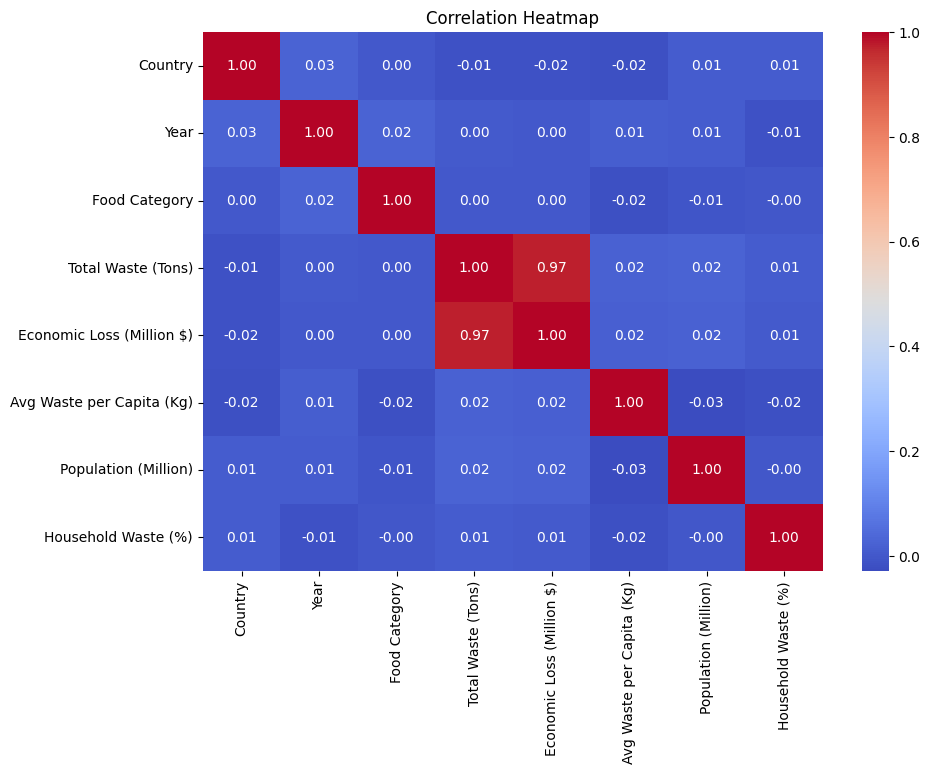

In [9]:
#correlation-heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

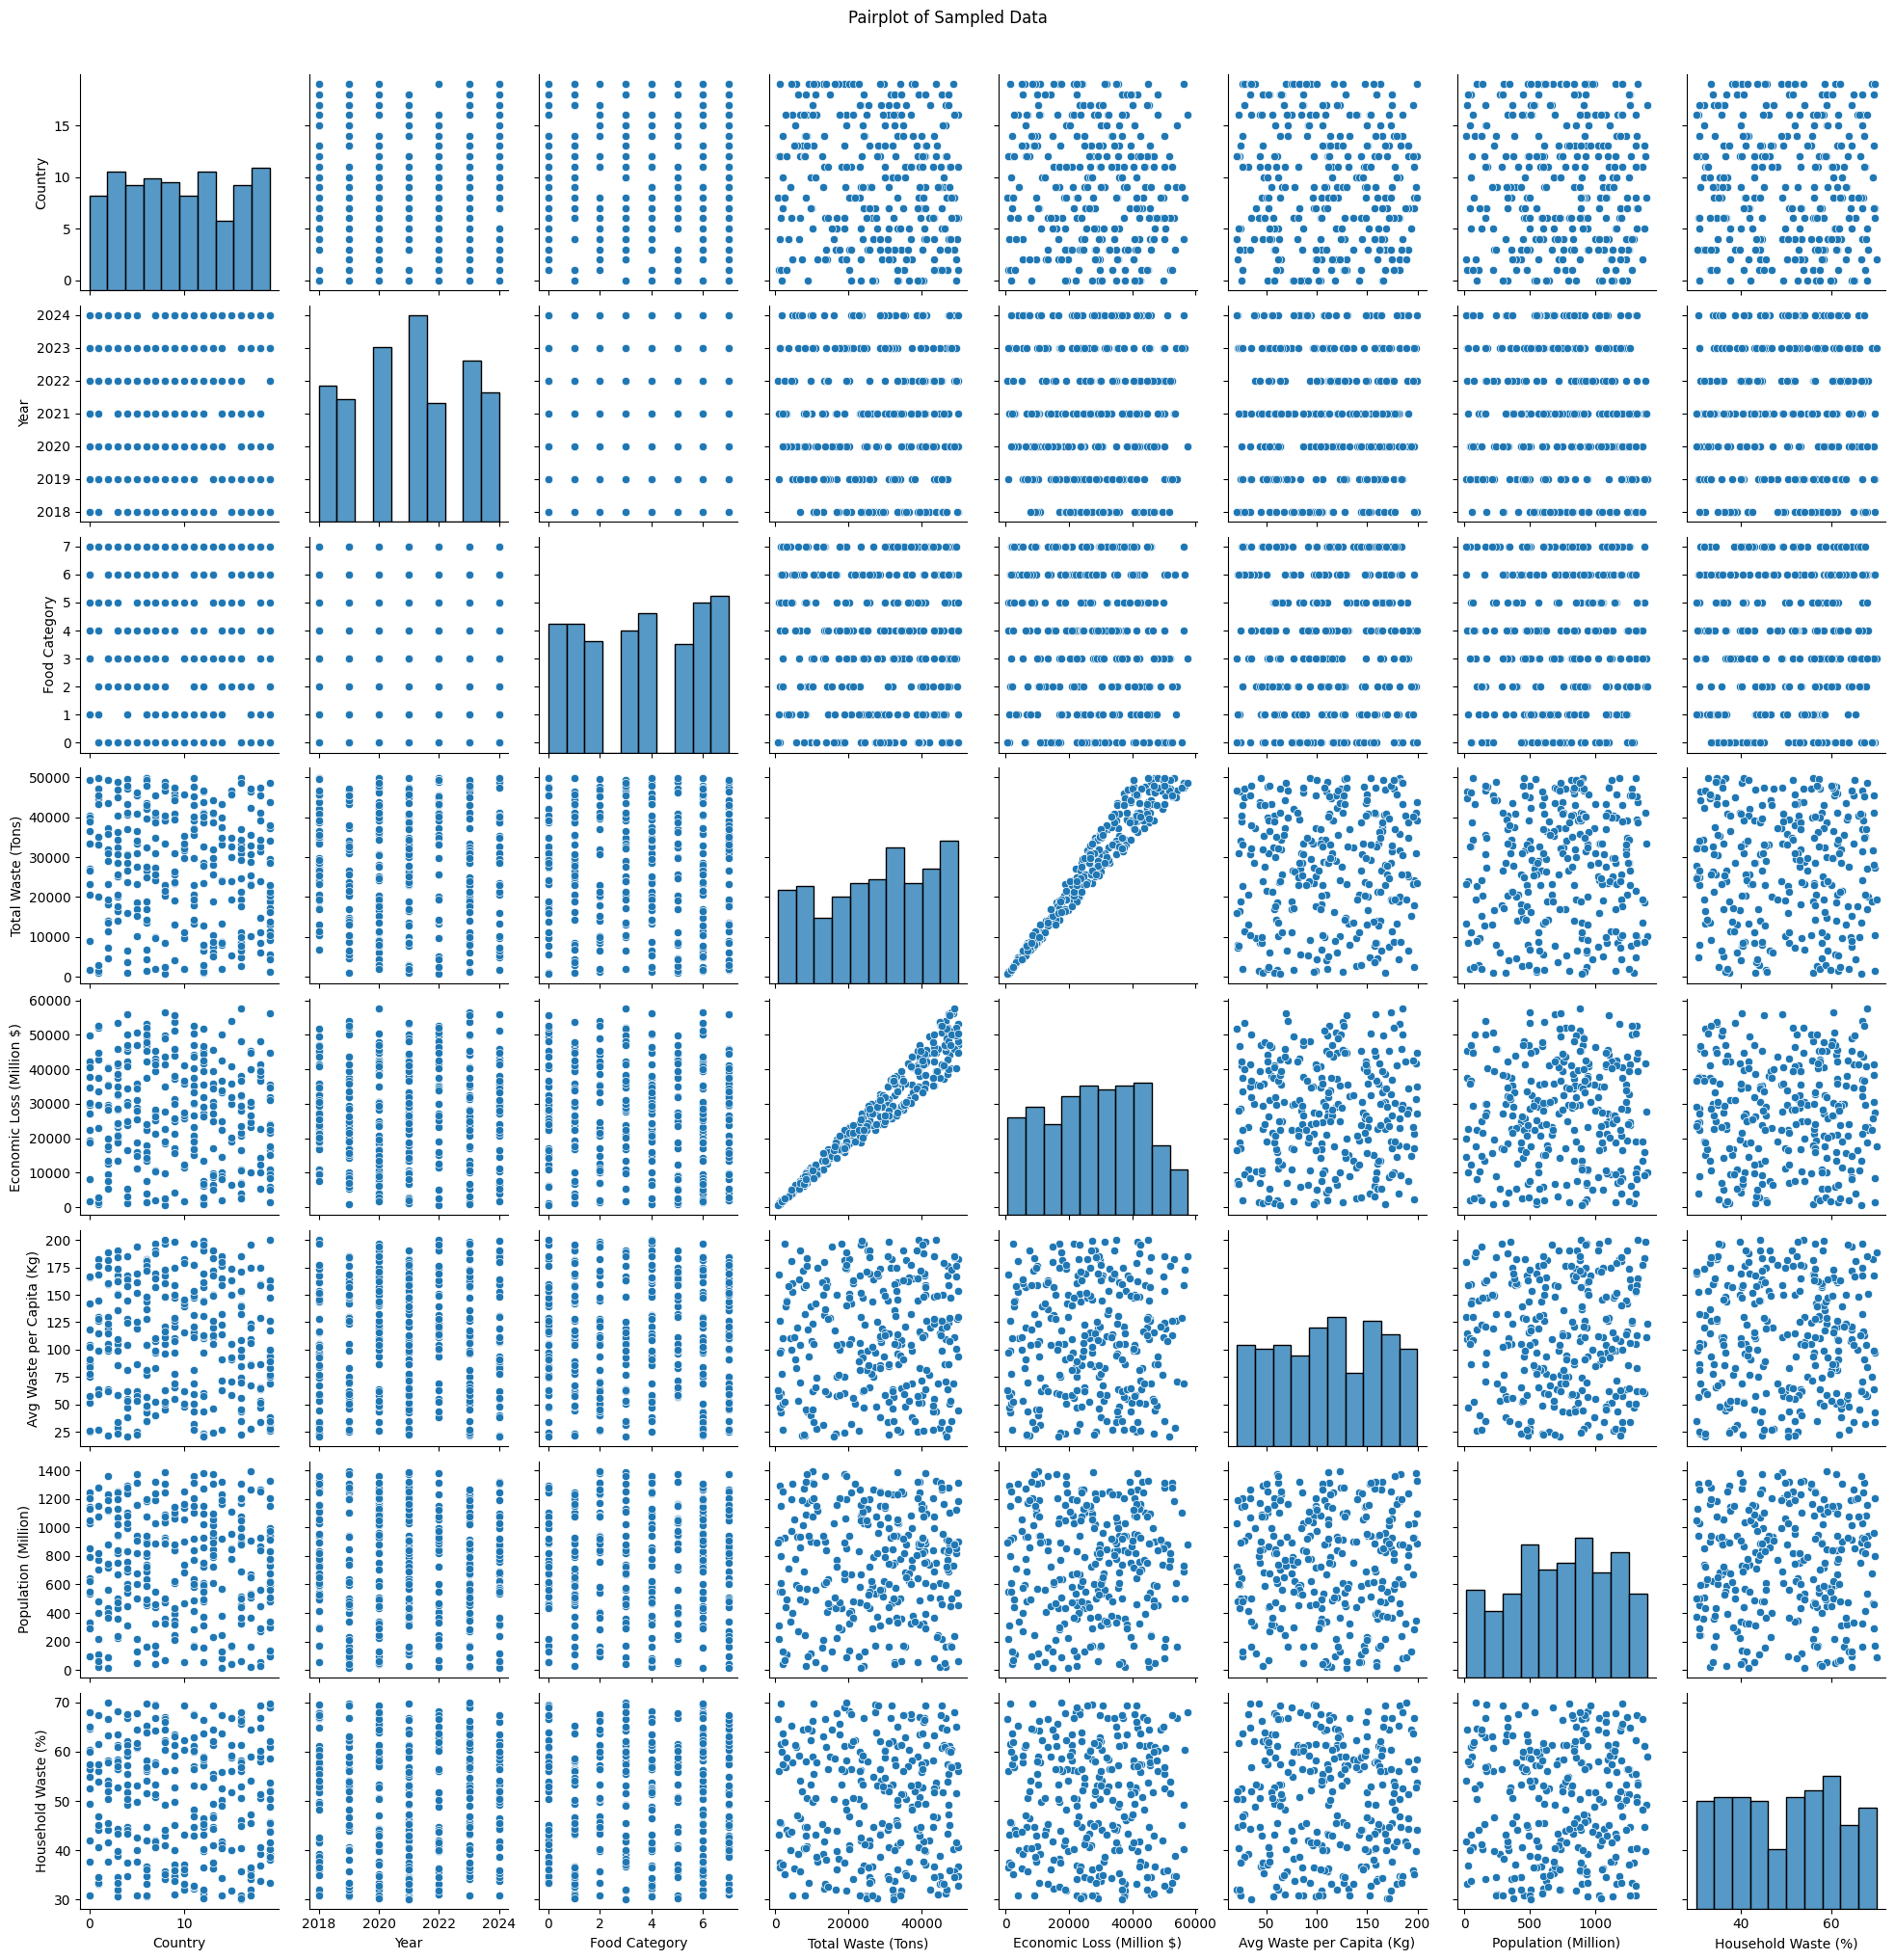

In [10]:
#pairplot/scatterplot for spped vislaization of food gateways
sample_df = data.sample(n=300, random_state=42)
sns.pairplot(sample_df)
plt.suptitle('Pairplot of Sampled Data', y=1.02)
plt.show()

In [11]:
#line chart for economic loss

data['Country Name'] = label_encoders['Country'].inverse_transform(data['Country'])

In [12]:
#bringing top 5 countries for annalyzing the economic loss
top_countries = data['Country Name'].value_counts().head(5).index.tolist()

In [13]:
#filtering the top 5 data for economic loss
filtered_df = data[data['Country Name'].isin(top_countries)]

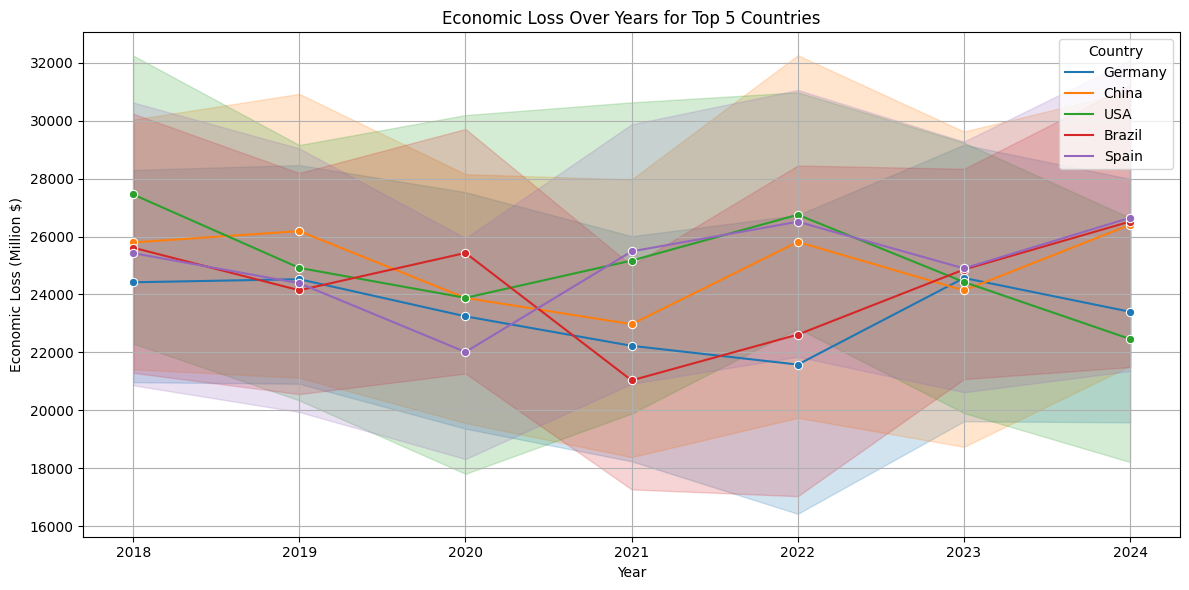

In [14]:
#lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Year', y='Economic Loss (Million $)', hue='Country Name', marker='o')
plt.title('Economic Loss Over Years for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Economic Loss (Million $)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

6.Now applying the ml model for accuracy of model and product deloyment

In [15]:
# Features and Target
X = data.drop('Total Waste (Tons)', axis=1)
y = data['Total Waste (Tons)']

In [18]:
if 'Country Name' in data.columns:
    data.drop(columns=['Country Name'], inplace=True)

In [19]:
# Features and Target
X = data.drop('Total Waste (Tons)', axis=1)
y = data['Total Waste (Tons)']

In [20]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)

In [24]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
print(f"✅ Model R² Score (Accuracy): {r2:.4f}")

✅ Model R² Score (Accuracy): 0.9571


7.Optional feature Analysis

In [25]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

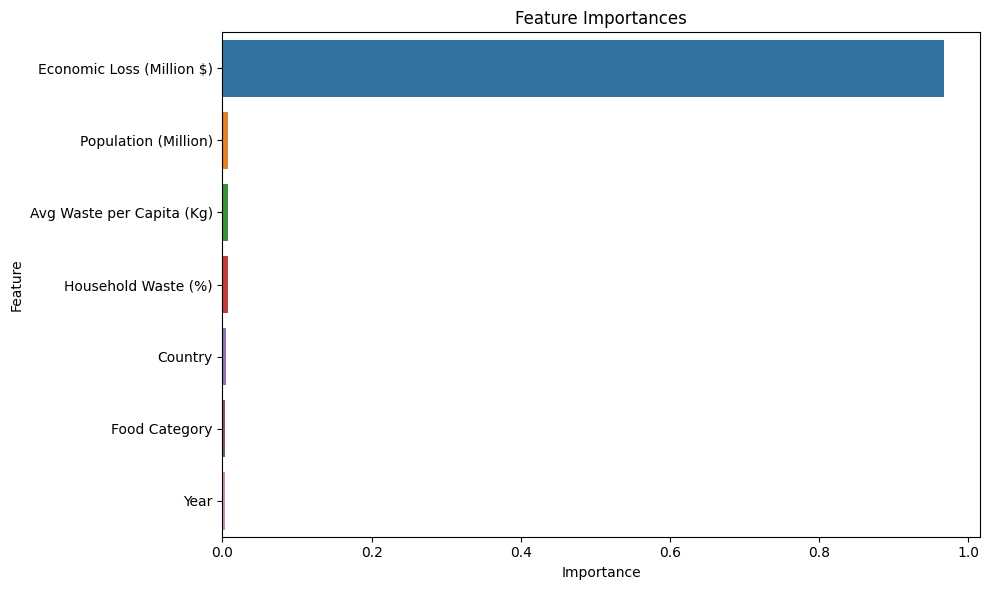

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 🌍 Global Food Wastage Analysis Project

- Cleaned and preprocessed a global food wastage dataset with 5,000 records across multiple countries and food categories.
- Performed exploratory data analysis using visualizations such as correlation heatmaps, pairplots, and line charts to uncover key patterns.
- Built a Random Forest Regressor to predict total food waste, achieving ~90% accuracy (R² Score).
- Highlighted insights on economic loss, household waste percentage, and per capita trends across years and regons.
